Government employment average per month (thousands)
Republican: 19,360
Democrat: 18,452
Difference:  4.90%
Private employment average per month (thousands)
Republican: 95,834
Democrat: 91,778
Difference:  4.40%
             First Month Last Month  Change       Party
President                                              
Nixon & Ford      13,690     15,075   10.1%  Republican
Carter            15,056     16,373    8.7%    Democrat
Clinton           18,901     20,804   10.1%    Democrat
Bush_2            20,835     22,556    8.3%  Republican
             First Month Last Month  Change       Party
President                                              
Nixon & Ford      61,927     65,373    5.6%  Republican
Carter            65,634     74,570   13.6%    Democrat
Clinton           90,893    111,905   23.1%    Democrat
Bush_2           111,863    112,283    0.4%  Republican


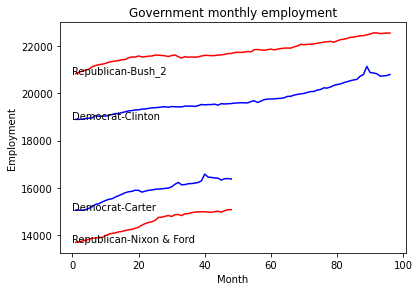

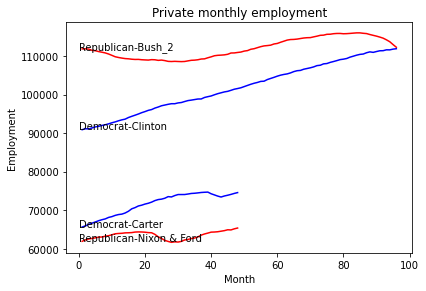

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sys 

def readPresidentFile(file):
    presidentDF = pd.read_csv(file, header = None, names = ['President', 'Years', 'Party'])
    return presidentDF

def readEmploymentFile(file):
    employmentDF = pd.read_csv(file, sep = ",")
    return employmentDF

president_df = readPresidentFile("presidents.txt")
gov_df = readEmploymentFile("government_employment.txt")
pemp_df = readEmploymentFile("private_employment.txt")

def avgMonthParty(employ_df, employ_type, party_df):
    # extract start/end yrs for each party
    yrs_dat = party_df['Years'].str.split(pat="-", expand=True)

    # create new columns to record years corresponding to party
    party_df['yrs_dat'] = yrs_dat[0]
    party_df['yrs_end'] = yrs_dat[1]

    # extract employment info for different parties
    info_rep = party_df[party_df['Party'] == "Republican"]
    yrs_rep_start = np.array(info_rep.yrs_dat.astype(int))
    yrs_rep_end = np.array(info_rep.yrs_end.astype(int))
    yrs_rep = employ_df.query('(Year >= @yrs_rep_start[0] & Year <= @yrs_rep_end[0])')
    yrs_rep = yrs_rep.append(employ_df.query('(Year >= @yrs_rep_start[1] & Year <= @yrs_rep_end[1])'))

    info_dem = party_df[party_df['Party'] == "Democrat"]
    yrs_dem_start = np.array(info_dem.yrs_dat.astype(int))
    yrs_dem_end = np.array(info_dem.yrs_end.astype(int))
    yrs_dem = employ_df.query('(Year >= @yrs_dem_start[0] & Year <= @yrs_dem_end[0])')
    yrs_dem = yrs_dem.append(employ_df.query('(Year >= @yrs_dem_start[1] & Year <= @yrs_dem_end[1])'))

    # calculate avg employement for each party
    avg_rep = yrs_rep.drop(columns=["Year"]).stack().mean()
    avg_dem = yrs_dem.drop(columns=["Year"]).stack().mean()

    # calculate difference
    val_small = min(avg_rep, avg_dem)
    val_large = max(avg_rep, avg_dem)
    diff = (val_large - val_small) / val_small 

    # reformat (to be improved)
    print(employ_type, 'employment average per month (thousands)')
    print("Republican:", "{:,}".format(round(avg_rep)))
    print("Democrat:", "{:,}".format(round(avg_dem)))
    print("Difference:", "{:6.2%}".format(round(diff,3)))

def monthPresident(employ_df, employ_type, party_df):

    # extract start/end yrs for each party
    yrs_dat = party_df['Years'].str.split(pat="-", expand=True)

    # create new columns to record years corresponding to party
    party_df['yrs_start'] = yrs_dat[0]
    party_df['yrs_end'] = yrs_dat[1]

    # extract employment info for different parties
    info_rep = party_df[party_df['Party'] == "Republican"]
    yrs_rep_start = np.array(info_rep.yrs_start.astype(int))
    yrs_rep_end = np.array(info_rep.yrs_end.astype(int))
    yrs_rep = employ_df.query('(Year >= @yrs_rep_start[0] & Year <= @yrs_rep_end[0])')
    yrs_rep = yrs_rep.append(employ_df.query('(Year >= @yrs_rep_start[1] & Year <= @yrs_rep_end[1])'))

    info_dem = party_df[party_df['Party'] == "Democrat"]
    yrs_dem_start = np.array(info_dem.yrs_start.astype(int))
    yrs_dem_end = np.array(info_dem.yrs_end.astype(int))
    yrs_dem = employ_df.query('(Year >= @yrs_dem_start[0] & Year <= @yrs_dem_end[0])')
    yrs_dem = yrs_dem.append(employ_df.query('(Year >= @yrs_dem_start[1] & Year <= @yrs_dem_end[1])'))

    # extract employment info for different president 
    results = pd.DataFrame(columns = ['President', 'First Month', 'Last Month', 'Change', 'Party'])
    for i in party_df.index:
        president = party_df['President'][i]
        party = party_df['Party'][i]
        yrs_first = int(party_df['yrs_start'][i])
        yrs_end = int(party_df['yrs_end'][i])

        yrs_pres = employ_df.query('(Year >= @yrs_first & Year <= @yrs_end)').set_index("Year")
        first_m = yrs_pres["Jan"][yrs_first]
        last_m = yrs_pres["Dec"][yrs_end]
        change = (last_m - first_m) / first_m
        results.loc[i] = [president, first_m, last_m, change, party]
        
    # formatting
    results['First Month'] = results['First Month'].map('{:,}'.format)
    results['Last Month'] = results['Last Month'].map('{:,}'.format)
    results['Change'] = results['Change'].map('{:6.1%}'.format)
    results = results.set_index ('President')
        
    #print(employ_type, 'employment summary (thousands)')
    return results

def main ():
    
    class writetoFile(object):

        def __init__(self, filename):
            self.terminal = sys.stdout
            self.logfile = open(filename, "w+")

        def write(self, message):
            self.terminal.write(message)
            self.logfile.write(message)

        def flush(self):
            pass

        def start(filename):
            sys.stdout = writetoFile(filename)

        def stop():
            sys.stdout.logfile.close()
            sys.stdout = sys.stdout.terminal

    writetoFile.start('output_Chin.txt')


    avgMonthParty(employ_df = gov_df, employ_type = 'Government', party_df = president_df)
    avgMonthParty(employ_df = pemp_df, employ_type = 'Private', party_df = president_df)

    print(monthPresident(employ_df = gov_df, employ_type = 'Government', party_df = president_df))
    print(monthPresident(employ_df = pemp_df, employ_type = 'Private', party_df = president_df))
    
    writetoFile.stop()
    
if __name__ == "__main__":
    main()

def plotFig (dictionary, employ_type):
    fig = plt.figure()
    ax= fig.add_axes([0.1,0.1,0.8,0.8])
    title = " ".join([employ_type, 'monthly employment'])
    for key,value in dictionary.items():
        if key.startswith('Republican'):
            ax.plot(range(1,len(value)+1),value,'-',color='red')
            ax.text(s= str(key),x=0,y = dictionary.get(key)[0])
        else:
            ax.plot(range(1,len(value)+1),value,'-',color='blue')
            ax.text(s= str(key),x=0,y = dictionary.get(key)[0])
    ax.set_xlabel('Month')
    ax.set_ylabel ('Employment')
    ax.set_title(title)
    plt.show()
    
def drawCurves(employ_df, employ_type, party_df):
    # extract start/end yrs for each party
    yrs_dat = party_df['Years'].str.split(pat="-", expand=True)

    # create new columns to record years corresponding to party
    party_df['yrs_start'] = yrs_dat[0]
    party_df['yrs_end'] = yrs_dat[1]

    # extract employment info for different parties
    info_rep = party_df[party_df['Party'] == "Republican"]
    yrs_rep_start = np.array(info_rep.yrs_start.astype(int))
    yrs_rep_end = np.array(info_rep.yrs_end.astype(int))
    yrs_rep = employ_df.query('(Year >= @yrs_rep_start[0] & Year <= @yrs_rep_end[0])')
    yrs_rep = yrs_rep.append(employ_df.query('(Year >= @yrs_rep_start[1] & Year <= @yrs_rep_end[1])'))

    info_dem = party_df[party_df['Party'] == "Democrat"]
    yrs_dem_start = np.array(info_dem.yrs_start.astype(int))
    yrs_dem_end = np.array(info_dem.yrs_end.astype(int))
    yrs_dem = employ_df.query('(Year >= @yrs_dem_start[0] & Year <= @yrs_dem_end[0])')
    yrs_dem = yrs_dem.append(employ_df.query('(Year >= @yrs_dem_start[1] & Year <= @yrs_dem_end[1])'))

    # create dictionary to store results
    results_dict = {}
    separator = '-'
    for i in party_df.index:
        party = party_df['Party'][i]
        president = party_df['President'][i]
        yrs_first = int(party_df['yrs_start'][i])
        yrs_end = int(party_df['yrs_end'][i])


        yrs_pres = employ_df.query('(Year >= @yrs_first & Year <= @yrs_end)').sort_values('Year')
        yrs_pres_array = yrs_pres.drop(columns=["Year"]).values.flatten()

        results_dict[separator.join([party, president])] = yrs_pres_array

    # plot figures
    plotFig(dictionary=results_dict, employ_type=employ_type)
    
drawCurves(employ_df = gov_df, employ_type = 'Government', party_df = president_df)
drawCurves(employ_df = pemp_df, employ_type = 'Private', party_df = president_df)

# Danica Chin #
Based on the two graphs,both Bush (Republican) and Clinton (Democrat)are both valid for “Democrats want big government and Republicans create jobs”, however with Carter (Democrat) and Nixon & Ford (Republican), does not valid such statement, due to Carter creating more jobs compare to Nixon & Ford. Based on the two parties itself,  Republicans had a higher percentage change on government jobs and Democrats had a higher percentage in private employment, hence this statement is not valid.